In [1]:
import altair as alt
from preprocess import split_test_data

# EDA document

## Research question

Can we build a model to accurately predict a white wine's quality based on its physicochemical properties?

In [2]:
!python download_data.py --url=http://www3.dsi.uminho.pt/pcortez/wine/winequality.zip --path=../data/raw/

Data downloaded to ../data/raw/


## Data overview

First, let's read in the data and get an idea for what the data looks like. We will set aside 20% of the dataset as the test set for our model, so we will only perform EDA on the 80% train set. Since the data is shuffled by the `split_test_data` function, we can just look at a subset of it rather than the head and tail.

In [3]:
data, _ = split_test_data("../data/raw/winequality/winequality-white.csv")
data.head(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
2552            6.6             0.360         0.52            11.3      0.046   
4577            6.3             0.150         0.34            11.4      0.050   
2738            6.9             0.615         0.42            12.0      0.067   
1090            8.3             0.210         0.58            17.1      0.049   
3813            7.0             0.300         0.28             2.2      0.042   
0               7.0             0.270         0.36            20.7      0.045   
4273            5.7             0.220         0.20            16.0      0.044   
3916            7.1             0.370         0.30             6.2      0.040   
3368            6.6             0.180         0.28             1.7      0.041   
2308            9.4             0.280         0.30             1.6      0.045   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
2552                  8.0                 110.0  0.99660  3.07       0.46   
4577                 25.0                  96.0  0.99754  3.21       0.49   
2738                 24.0                 131.0  0.99727  3.19       0.34   
1090                 62.0                 213.0  1.00060  3.01       0.51   
3813                 21.0                 177.0  0.99166  3.20       0.57   
0                    45.0                 170.0  1.00100  3.00       0.45   
4273                 41.0                 113.0  0.99862  3.22       0.46   
3916                 49.0                 139.0  0.99021  3.17       0.27   
3368                 53.0                 161.0  0.99207  3.13       0.45   
2308                 36.0                 139.0  0.99534  3.11       0.49   

      alcohol  quality  
2552      9.4        5  
4577     10.0        6  
2738      9.3        5  
1090      9.3        6  
3813     11.4        5  
0         8.8        6  
4273      8.9        6  
3916     13.6        6  
3368     10.2        6  
2308      9.3        5

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3918 entries, 2552 to 3988
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         3918 non-null   float64
 1   volatile acidity      3918 non-null   float64
 2   citric acid           3918 non-null   float64
 3   residual sugar        3918 non-null   float64
 4   chlorides             3918 non-null   float64
 5   free sulfur dioxide   3918 non-null   float64
 6   total sulfur dioxide  3918 non-null   float64
 7   density               3918 non-null   float64
 8   pH                    3918 non-null   float64
 9   sulphates             3918 non-null   float64
 10  alcohol               3918 non-null   float64
 11  quality               3918 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 397.9 KB


We see that there are no missing values! The entire white wine dataset contains 4898 rows and the train data contains 80% which is exactly 3918, so everything is consistent. We also see that there are 11 features and 1 target which is exactly what we expected to see.

## Data visualization

### Visualizing the targets

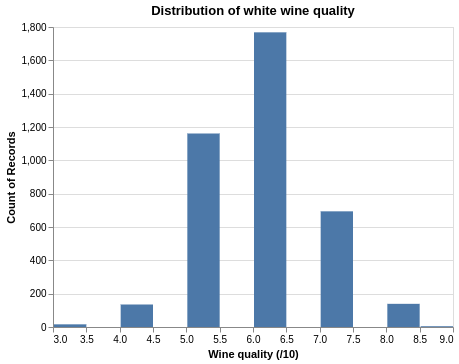

In [5]:
alt.renderers.enable('mimetype')

alt.Chart(data, title="Distribution of white wine quality").mark_bar().encode(
    x=alt.X("quality", bin=alt.Bin(maxbins=12), title="Wine quality (/10)"),
    y="count()"
)

In [6]:
num_5 = sum(data.quality == 5)
num_6 = sum(data.quality == 6)
print(f"Proportion of wines with a quality of 5 or 6: {(num_5 + num_6) / len(data)}")

Proportion of wines with a quality of 5 or 6: 0.7475752935171006


We notice that the majority of wines are rated 6/10 with 5/10 in second place. The quality distribution looks bell-shaped with almost 75% of the wines being rated a 5 or 6.

### Visualizing the relationship between individual features and the quality

Since there are too many features to fit on one plot, we will do split them into 3 batches.

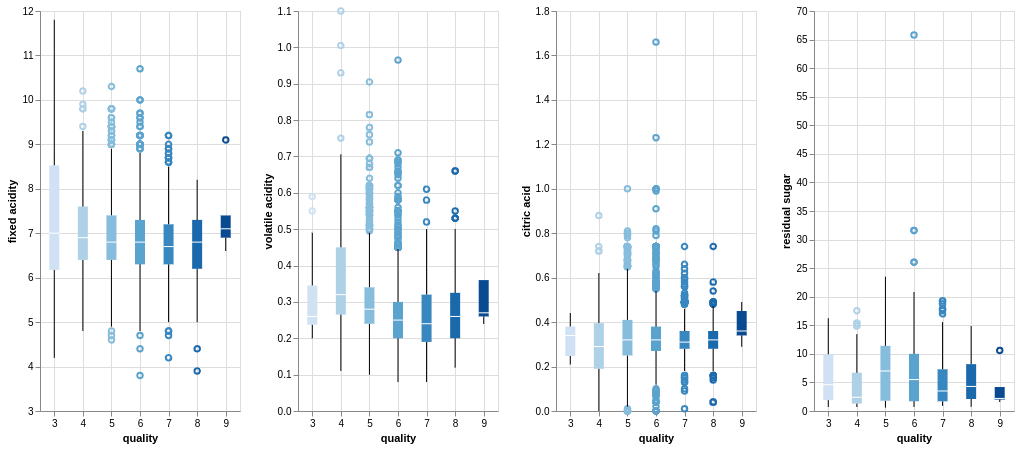

In [7]:
alt.Chart(data).mark_boxplot(opacity=1, size=10).encode(
    y=alt.Y(alt.repeat(), type="quantitative", scale=alt.Scale(zero=False)),
    x=alt.X("quality", scale=alt.Scale(zero=False)),
    color=alt.Color("quality", legend=None)
).properties(
    width=200,
    height=400
).repeat(
    ["fixed acidity", "volatile acidity", "citric acid", "residual sugar"]
)

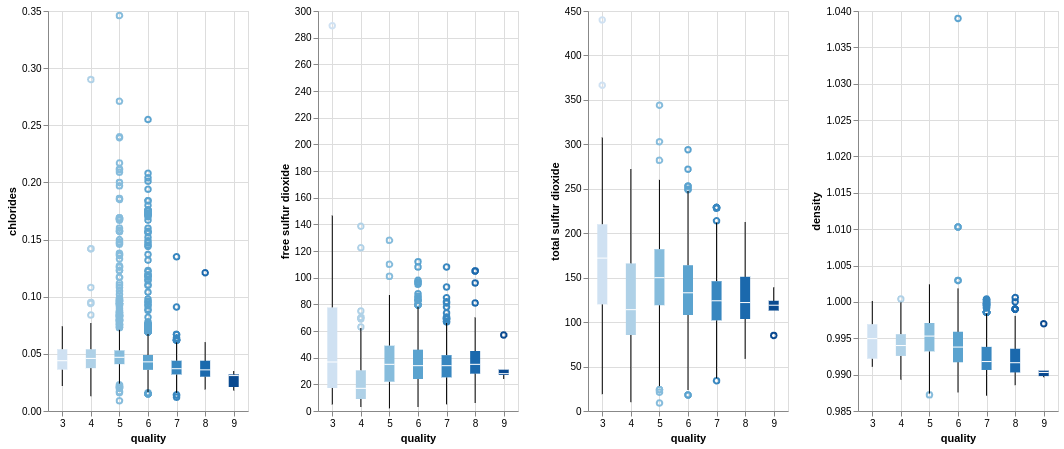

In [8]:
alt.Chart(data).mark_boxplot(opacity=1, size=10).encode(
    y=alt.Y(alt.repeat(), type="quantitative", scale=alt.Scale(zero=False)),
    x=alt.X("quality", scale=alt.Scale(zero=False)),
    color=alt.Color("quality", legend=None)
).properties(
    width=200,
    height=400
).repeat(
    ["chlorides", "free sulfur dioxide", "total sulfur dioxide", "density"]
)

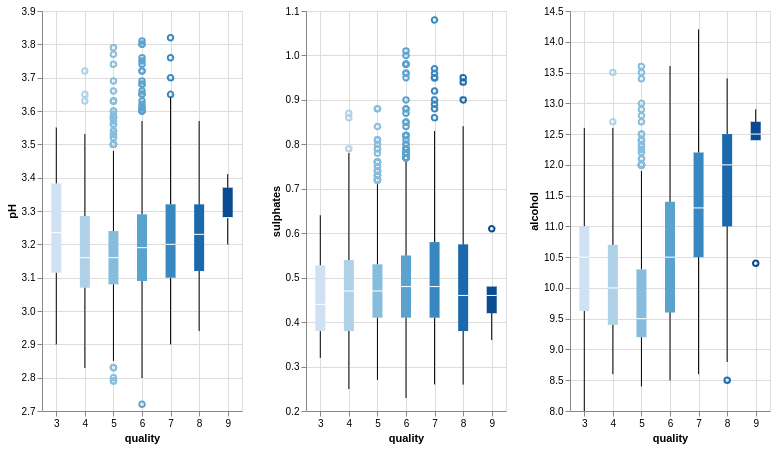

In [9]:
alt.Chart(data).mark_boxplot(opacity=1, size=10).encode(
    y=alt.Y(alt.repeat(), type="quantitative", scale=alt.Scale(zero=False)),
    x=alt.X("quality", scale=alt.Scale(zero=False)),
    color=alt.Color("quality", legend=None)
).properties(
    width=200,
    height=400
).repeat(
    ["pH", "sulphates", "alcohol"]
)

From these plots, we don't see any obvious correlations between any single feature and wine quality. The median line for each feature doesn't change too much as we increase the quality. The only feature that stands out a little bit is the alcohol percentage. It seems that very highly rated wines also have a high alcohol percentage; but it is worth remembering that there are very few training examples with a quality of 8 or 9. We can also see that some features like `chlorides` and `volatile acidity` have relatively many outliers whereas others like `density` and `total sulfur dioxide` have few outliers.